<a href="https://colab.research.google.com/github/riyag25/RIYAG/blob/main/Presentation_of_data_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carry out Visualization for the following questions:
1. Compare churn count with respect to gender.
2. Find out how many female senior citizens there in the dataset
3. Compare 'tenure' with 'Total Charges'
4. Find out which contract is preferred by the senior citizen.
5. Comment on your finds on Payment Method?

In [55]:
# import libraries and load the data to python environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_excel('Telco-Customer-Churn.xlsx',index_col = 0)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [58]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Compare churn count with respect to gender

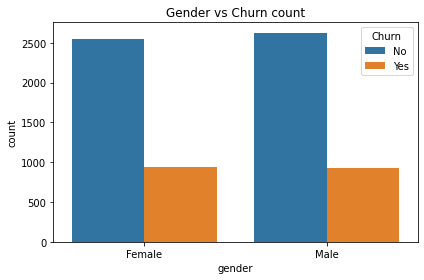

In [60]:
sns.countplot( x ='gender', data = df, hue = 'Churn' ) 
plt.title("Gender vs Churn count")
plt.tight_layout()

## 2.Find out how many female senior citizens there in the dataset

In [61]:
# first check what values are available in Seniorcitizen column.
df.SeniorCitizen.value_counts()

0.0    5901
1.0    1142
Name: SeniorCitizen, dtype: int64

In [62]:
#We need to filter out Female from gender and Senior citizen ==1 from SeniorCitizen column.Then use count method to get the value.
df[(df['gender']=='Female') &  (df['SeniorCitizen']==1.0)]['SeniorCitizen'].count()

568

### ***There are 568 female senior citizens there in the dataset .***

##  3.Compare 'tenure' with 'Total Charges'

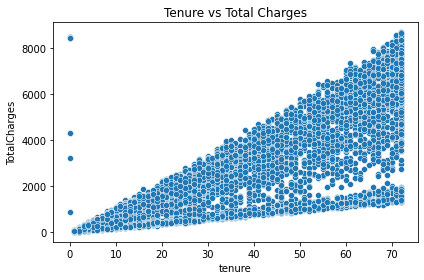

In [63]:
sns.scatterplot(data =df, x = 'tenure', y ='TotalCharges')
plt.title("Tenure vs Total Charges")
plt.tight_layout()

The band  of Total charge values is increasing with tenure.The lower limit of total charge is increasing slowly with tenure,but the upper limit of total charge has a fast rate of increase with tenure.

## 4.Find out which contract is preferred by the senior citizen.

In [64]:
# First lets check how many types of contracts are available in the data set.
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

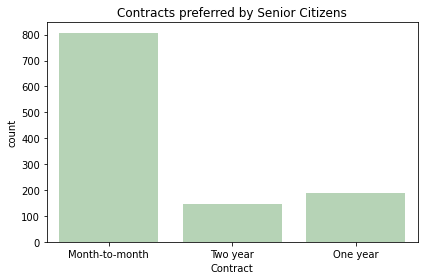

In [65]:
# To see whichc is preferred by senior citizens, lets draw a barplot after filtering senior citizens 
dfS = df[df['SeniorCitizen']==1.0]
sns.countplot(x ='Contract', data = dfS, color = 'green', alpha = 0.3)
plt.title("Contracts preferred by Senior Citizens")
plt.tight_layout()

### ***Senior Citizens prefer month to month contract***

## 5.Comment on your finds on Payment Method?

In [67]:
# First check what are the types of payment
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

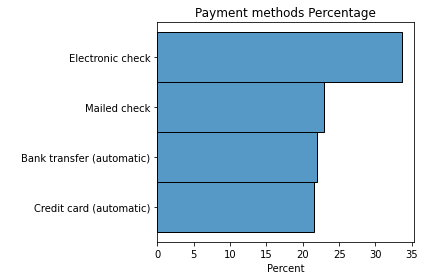

In [71]:
#Lets plot to see the percentage distribution of payment methods
sns.histplot(y ='PaymentMethod', data =df ,stat = 'percent' )
plt.ylabel(" ")
plt.title("Payment methods Percentage")
plt.tight_layout()

In [51]:
#to check percentage of senior citizen
df.SeniorCitizen.value_counts(normalize =True)

0.0    0.837853
1.0    0.162147
Name: SeniorCitizen, dtype: float64

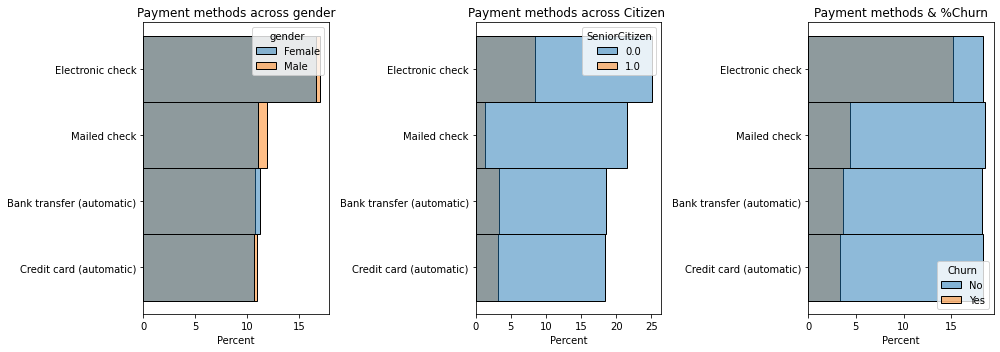

In [70]:
#Lets see how payment method varies across gender, citizen and Churn rate.
plt.figure(figsize = (14,5))

plt.subplot(1,3,1)
sns.histplot(y= 'PaymentMethod', data =df, hue = 'gender',stat ='percent')
plt.ylabel("")
plt.title("Payment methods across gender")

plt.subplot(1,3,2)
sns.histplot(y= 'PaymentMethod', data =df, hue = 'SeniorCitizen', stat ='percent')
plt.title("Payment methods across Citizen ")
plt.ylabel("")

plt.subplot(1,3,3)
sns.histplot(y = 'PaymentMethod', data = df, hue ='Churn', stat ='percent')
plt.title("Payment methods & %Churn")
plt.ylabel("")

plt.tight_layout()


 ## **Findings on payment method**
 *</p>*Almost 34% of the payment method is by Electronic check. Payment methods are not varying much across gender.*</p>
</p>Only 16% of the data constitute senior citizens.Senior citizens prefer mostly elcetronic check, then bank transfer,credit card and least preferred is mailed check for payment. Non senior citizens top payment method is also elcetronic check, followed by mailed check, then Bank transfer and Credit card.</p>

</p> 
Churn rate is high among electronic payment method,followed by mailed check,Bank transfer ,then credit card.Around 45% of users preferring electronic payment method are churn. </p>

